# Functions and solving equations in Python

29.10366858


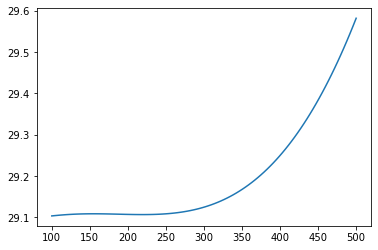

In [12]:
A =  28.98641
B =  1.853978
C = -9.647459
D =  16.63537
E =  0.000117



def get_Cp(T):
    t = T/1000.
    C_p = A + B*t + C*t**2 + D*t**3 + E/ t**2
    return C_p
    
    
Cp = get_Cp(100)
print(Cp)


import numpy as np
import pylab as plt

T_list = np.linspace(100, 500, 100)
Cp_list = [get_Cp(T) for T in T_list] # creating a list of heat capacities
plt.plot(T_list, Cp_list)
plt.show()

35.51872 1.128728 -0.196103 0.014662 -4.55376


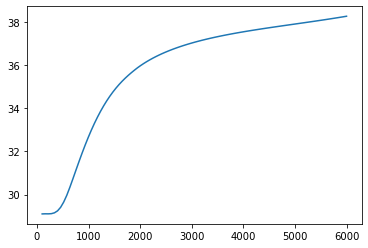

In [18]:
def get_coefficients(T):
    
    if (T>=100 and T<500):
        A =  28.98641
        B =  1.853978
        C = -9.647459
        D =  16.63537
        E =  0.000117
    elif (T>=500 and T<2000):        
        A =  19.50583
        B =  19.88705
        C = -8.598535
        D =  1.369784
        E =  0.527601
    elif (T>=2000 and T<=6000):        
        A =  35.51872
        B =  1.128728
        C = -0.196103
        D =  0.014662
        E = -4.553760
    return A, B, C, D, E

A, B, C, D, E = get_coefficients(4000)

print(A, B, C, D, E)

def get_Cp(T):
    t = T/1000
    A, B, C, D, E = get_coefficients(T)
    C_p = A + B*t + C*t**2 + D*t**3 + E/ t**2
    return C_p
    


import numpy as np
import pylab as plt

T_list = np.linspace(100, 6000, 100)
Cp_list = [get_Cp(T) for T in T_list] # creating a list of heat capacities
plt.plot(T_list, Cp_list)
plt.show()


In [26]:
def get_vapor_pressure_water(T):
    A = 6.20963
    B = 2354.731
    C = 7.559 
    log_p = A - B/(T+C)
    p = 10.0**log_p
    return p   # in bar
    
def get_vapor_pressure_aceticacid(T):
    A = 4.68206 
    B = 1642.54 
    C = -39.764
    log_p = A - B/(T+C)
    p = 10.0**log_p
    return p   # in bar

def get_total_pressure(T):
    p = x_water*get_vapor_pressure_water(T)
    p += x_aceticacid*get_vapor_pressure_aceticacid(T)
    return p
    
T = 300    
x_aceticacid = 0.0    
x_water = 1 - x_aceticacid    
pvap_water = get_vapor_pressure_water(T)
pvap_aceticacid = get_vapor_pressure_aceticacid(T)
pvap = get_total_pressure(T)
print(pvap_water)
print(pvap_aceticacid)
print(pvap)

0.035763268599523286
0.02345997648740174
0.035763268599523286


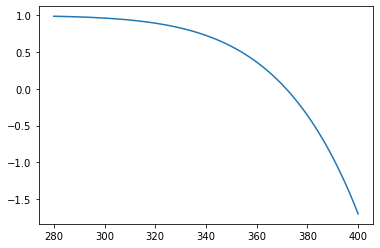

[371.64732952]


In [28]:
def error(T):
    return p - x_water*get_total_pressure(T)
    
    
p = 1.0 # pressure in bar

T_list = np.linspace(280, 400, 100)
err_list = [error(T) for T in T_list]
plt.plot(T_list, err_list)
plt.show()


from scipy.optimize import fsolve

T0 = 373
solution = fsolve(error, T0)
print(solution)

In [31]:
def get_boiling_temperature(p, x_aceticacid):
    x_water = 1.0 - x_aceticacid
    def get_total_pressure(T):
        p = x_water*get_vapor_pressure_water(T)
        p += x_aceticacid*get_vapor_pressure_aceticacid(T)
        return p
    def error(T):
        return p - x_water*get_total_pressure(T)
    solution = fsolve(error, 373)
    return solution

T_boil = get_boiling_temperature(0.8, 0.1)
print(T_boil)
    

[369.77054091]


In [44]:
data = {}
data['water'] = {'A':6.20963, 'B':2354.731, 'C':7.559}
data['aceticacid'] = {'A':4.68206, 'B':	1642.54, 'C':-39.764}
data['acetone'] = {'A':4.42448, 'B':1312.253, 'C':-32.445}
N_dict = {'water': 0.9, 'aceticacid':0.1, 'acetone':0.1}

print(data)

def get_vapor_pressure(T, mol):
    A = data[mol]['A']
    B = data[mol]['B']
    C = data[mol]['C']
    log_p = A - B/(T+C)
    p = 10.0**log_p
    return p   # in bar

def get_total_pressure(T, x_dict):
    p = 0.0
    for mol, x_mol in x_dict.items():
        p += x_mol*get_vapor_pressure(T, mol)
    return p


x_dict = {}
N_total = sum(N_dict.values())
for mol, N in N_dict.items():
    x_dict[mol] = N / N_total
print(x_dict)    


T = 300
pvap = get_vapor_pressure(T, 'water')
print(pvap)
pvap = get_vapor_pressure(T, 'aceticacid')
print(pvap)
pvap = get_total_pressure(T, x_dict)
print(pvap)

p = 0.8
def error(T):
    return p - get_total_pressure(T, x_dict)

T0 = 373
solution = fsolve(error, T0)
print(solution)


{'water': {'A': 6.20963, 'B': 2354.731, 'C': 7.559}, 'aceticacid': {'A': 4.68206, 'B': 1642.54, 'C': -39.764}, 'acetone': {'A': 4.42448, 'B': 1312.253, 'C': -32.445}}
{'water': 0.8181818181818181, 'aceticacid': 0.09090909090909091, 'acetone': 0.09090909090909091}
0.035763268599523286
0.02345997648740174
0.061487382469237156
[360.32060084]
